In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import struct
import sys
import time
from model.FittingTree import *
from model.MET import *
from model.MET_Meta import *
from model.FT_Meta import *
from model.MET_Meta_SGD import *

In [3]:
# Real World Data
# 'd' for double, 'l' for uint
datafile = open('./data/longtitude_china.double','rb')
data = datafile.read(8)
data_len, = struct.unpack('d', data)
data_len = int(data_len)
data=[]
for i in tqdm(range(data_len)):
    data_bin = datafile.read(8)
    data_unix, = struct.unpack('d',data_bin)
    data.append(data_unix)

100%|██████████| 1783525/1783525 [00:01<00:00, 1275332.43it/s]


In [4]:
epsilon_list = list(range(25,400,25))
FT_Index_seg_num = []
FT_Index_mae = []
starttime = time.perf_counter()
for i in range(len(epsilon_list)):
    epsilon = epsilon_list[i]
    FT_Index = FT(epsilon)
    FT_Index.learn_index(data)
    FT_Index_seg_num.append(FT_Index.seg_num)
    FT_Index_mae.append(FT_Index.mae)
endtime = time.perf_counter()
avg_time = (endtime - starttime) / len(epsilon_list)
avg_time

  4%|▎         | 66123/1783525 [00:00<00:02, 661224.32it/s]

6007 6.930558155548702


  4%|▍         | 67352/1783525 [00:00<00:02, 673514.22it/s]

3108 14.848349383010236


  4%|▍         | 67006/1783525 [00:00<00:02, 670059.04it/s]

2171 22.944924481516903


  4%|▍         | 67646/1783525 [00:00<00:02, 676455.81it/s]

1686 31.64756423375058


  4%|▍         | 67782/1783525 [00:00<00:02, 677815.80it/s]

1393 39.71101412916506


  4%|▍         | 68364/1783525 [00:00<00:02, 683632.50it/s]

1188 48.073843252268055


  4%|▍         | 68279/1783525 [00:00<00:02, 682299.38it/s]

1050 56.38592315642392


  4%|▍         | 68337/1783525 [00:00<00:02, 681980.45it/s]

944 64.93704351253936


  4%|▍         | 69070/1783525 [00:00<00:02, 690697.37it/s]

854 73.9641233027163


  4%|▍         | 68276/1783525 [00:00<00:02, 682759.02it/s]

774 80.95854323029664


  4%|▍         | 69690/1783525 [00:00<00:02, 696894.02it/s]

712 90.14984555549952


  4%|▍         | 69662/1783525 [00:00<00:02, 696612.36it/s]

662 98.83667446209051


  4%|▍         | 68334/1783525 [00:00<00:02, 683335.76it/s]

623 106.36284874926562


  4%|▍         | 67819/1783525 [00:00<00:02, 678189.03it/s]

591 115.1875479945821


100%|██████████| 1783525/1783525 [00:02<00:00, 758870.00it/s]

564 123.81715699169236


2.430350361764431

In [3]:
epsilon_list = list(range(25,400,25))
seg_err_list = [  2057.73659637,   8520.72147147,  18849.7680497 ,  33478.18623962,
        50843.92424603,  72172.47583039,  95776.86056911, 122687.33107066,
       154469.39462936, 186552.43645325, 225820.93159322, 266280.48311178,
       304495.66583553, 347613.99583255, 391544.31724044]

In [5]:
FT_Meta_Index_seg_num_withBound = []
FT_Meta_Index_mae_withBound = []
starttime = time.perf_counter()
for i in range(len(epsilon_list)):
    FT_Meta_Index = FT_Meta(epsilon_list[i],init_epsilon=range(25,400,25),low=1,high=1000,withBound=True)
    FT_Meta_Index.learn_index_lookahead(data,lookn=400)
    FT_Meta_Index_seg_num_withBound.append(FT_Meta_Index.seg_num)
    FT_Meta_Index_mae_withBound.append(FT_Meta_Index.mae)
endtime = time.perf_counter()
avg_time = (endtime - starttime) / len(epsilon_list)
avg_time

  3%|▎         | 55336/1783525 [00:00<00:03, 553359.21it/s]

6115 6.662933236147516


  2%|▏         | 39986/1783525 [00:00<00:04, 399856.57it/s]

3203 13.712050013316325


  3%|▎         | 59529/1783525 [00:00<00:02, 595283.47it/s]

2282 20.57369030431309


  3%|▎         | 59863/1783525 [00:00<00:02, 598626.29it/s]

1756 28.107757390560828


  2%|▏         | 35384/1783525 [00:00<00:04, 353833.59it/s]

1470 35.18153600313985


  2%|▏         | 33746/1783525 [00:00<00:05, 337457.10it/s]

1263 42.652366521355184


  4%|▎         | 63254/1783525 [00:00<00:02, 632539.10it/s]

1112 49.450605402223125


  4%|▎         | 64078/1783525 [00:00<00:02, 640777.56it/s]

1006 56.52144881624872


  4%|▎         | 64023/1783525 [00:00<00:02, 640229.08it/s]

909 62.98977866864776


  4%|▎         | 65519/1783525 [00:00<00:02, 655182.81it/s]

832 70.06066693766557


  4%|▎         | 66012/1783525 [00:00<00:02, 656604.59it/s]

780 76.79279965237382


  4%|▎         | 66014/1783525 [00:00<00:02, 655021.40it/s]

733 83.27539283161155


  4%|▎         | 66018/1783525 [00:00<00:02, 654499.04it/s]

695 89.7648617204693


  4%|▎         | 65988/1783525 [00:00<00:02, 659875.91it/s]

662 96.42593235306485


100%|██████████| 1783525/1783525 [00:02<00:00, 733450.96it/s]

631 102.65277189834737


2.6205529270072776

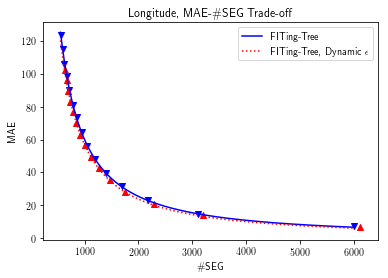

In [7]:
plt.rcParams["text.usetex"] = True
markers = ["v", "^", "o", "<", ">", "1", "2", "3", "4"]
colors = ["b", "r", "g", "purple", "teal", "tomato", "olive", "deeppink"]
linestyles = ['solid', 'dotted', '-.', ':', "--", (0, (3, 10, 1, 10)), (0, (3, 5, 1, 5, 1, 5)),
              (0, (5, 10))]

plt.title('Longitude, MAE-\#SEG Trade-off')
plt.xlabel('\#SEG')
plt.ylabel('MAE')
x = np.arange(550,6000)
def func(x,a,b):
    return a * x**b
p1,_ = curve_fit(func,FT_Index_seg_num,FT_Index_mae)
p2,_ = curve_fit(func,FT_Meta_Index_seg_num_withBound,FT_Meta_Index_mae_withBound)
#p3,_ = curve_fit(func,PGM_Index_seg_num,PGM_Index_mae)
#p4,_ = curve_fit(func,FT_Meta_Index_seg_num_withBound,FT_Meta_Index_mae_withBound)
plt.plot(x,p1[0]*x**p1[1],c=colors[0], linestyle=linestyles[0], label='FITing-Tree')
plt.scatter(FT_Index_seg_num, FT_Index_mae,c=colors[0],marker=markers[0])
plt.plot(x,p2[0]*x**p2[1],c=colors[1], linestyle=linestyles[1], label='FITing-Tree, Dynamic $\epsilon$')
plt.scatter(FT_Meta_Index_seg_num_withBound, FT_Meta_Index_mae_withBound,c=colors[1],marker=markers[1])
plt.legend()
#plt.savefig("{}.pdf".format("results/Main_exp/Longitude_tradeoff_22"), bbox_inches='tight', pad_inches=0)

In [6]:
seg_err_list = np.array(FT_Index_mae)*data_len/np.array(FT_Index_seg_num)
FT_Random_Index_seg_num = []
FT_Random_Index_mae = []
starttime = time.perf_counter()
epsilon_high_list = list(range(50,700,100))
for i in range(len(epsilon_high_list)):
    FT_Random_Index = FT_Random(epsilon_list[i],init_epsilon=range(25,400,25),low=1,high=epsilon_high_list[i],withBound=True)
    FT_Random_Index.learn_index_lookahead(data,lookn=400)
    FT_Random_Index_seg_num.append(FT_Random_Index.seg_num)
    FT_Random_Index_mae.append(FT_Random_Index.mae)
endtime = time.perf_counter()
avg_time = (starttime - endtime) / len(epsilon_list)
avg_time

  3%|▎         | 60520/1783525 [00:00<00:02, 605194.81it/s]

6126 9.583805665746205


  4%|▎         | 64862/1783525 [00:00<00:02, 648617.53it/s]

2184 31.09437210019484


  4%|▎         | 65650/1783525 [00:00<00:02, 656494.37it/s]

1456 50.85854753928316


  4%|▎         | 65968/1783525 [00:00<00:02, 659679.06it/s]

1100 72.80810978259346


  4%|▎         | 66069/1783525 [00:00<00:02, 659635.35it/s]

878 98.42962728304902


  4%|▎         | 66155/1783525 [00:00<00:02, 658866.03it/s]

749 114.88734780841311


100%|██████████| 1783525/1783525 [00:02<00:00, 734398.98it/s]

650 140.73121823355433


-1.1973011896014214

In [7]:
FT_Poly_Index_seg_num = []
FT_Poly_Index_mae = []
starttime = time.perf_counter()
for i in range(len(epsilon_list)):
    FT_Poly_Index = FT_Poly(epsilon_list[i],init_epsilon=range(25,400,25),low=1,high=1000,withBound=True)
    FT_Poly_Index.learn_index_lookahead(data,lookn=400)
    FT_Poly_Index_seg_num.append(FT_Poly_Index.seg_num)
    FT_Poly_Index_mae.append(FT_Poly_Index.mae)
endtime = time.perf_counter()
avg_time = (starttime - endtime) / len(epsilon_list)
avg_time

  1%|          | 10511/1783525 [00:00<00:16, 105109.10it/s]

6566 6.405254201651225


  1%|          | 15869/1783525 [00:00<00:11, 158689.77it/s]

4240 10.199745447919149


  1%|          | 19076/1783525 [00:00<00:09, 190758.36it/s]

3358 13.390650537559047


  1%|          | 20618/1783525 [00:00<00:08, 206153.16it/s]

2935 15.7783720441261


  1%|▏         | 24073/1783525 [00:00<00:07, 238792.81it/s]

2670 17.955801012040762


  1%|▏         | 24998/1783525 [00:00<00:07, 248871.26it/s]

2335 20.997288515720275


  1%|▏         | 25531/1783525 [00:00<00:06, 254580.06it/s]

2211 22.346376978175243


  2%|▏         | 27436/1783525 [00:00<00:06, 272172.14it/s]

2077 24.200949243772865


  2%|▏         | 29376/1783525 [00:00<00:05, 293758.18it/s]

1987 25.443675866612466


  2%|▏         | 30202/1783525 [00:00<00:05, 299455.75it/s]

1847 27.977028076421693


  2%|▏         | 30993/1783525 [00:00<00:05, 309928.82it/s]

1806 28.774834667302112


  2%|▏         | 32688/1783525 [00:00<00:05, 325490.44it/s]

1752 29.853230540642826


  2%|▏         | 33664/1783525 [00:00<00:05, 336593.78it/s]

1671 31.73024600159796


  2%|▏         | 33991/1783525 [00:00<00:05, 337100.55it/s]

1632 32.924082925666866


100%|██████████| 1783525/1783525 [00:04<00:00, 422437.13it/s]

1598 33.60721828962308


-5.979995515445868

In [ ]:
FT_LS_Index_seg_num = []
FT_LS_Index_mae = []
starttime = time.perf_counter()
for i in range(len(epsilon_list)):
    FT_LS_Index = FT_LS(epsilon_list[i],init_epsilon=range(25,400,50),low=1,high=1000,withBound=True)
    FT_LS_Index.learn_index_lookahead(data,lookn=400)
    FT_LS_Index_seg_num.append(FT_LS_Index.seg_num)
    FT_LS_Index_mae.append(FT_LS_Index.mae)
endtime = time.perf_counter()
avg_time = (starttime - endtime) / len(epsilon_list)
avg_time

 52%|█████▏    | 928400/1783525 [04:29<06:40, 2135.15it/s]

In [ ]:
plt.rcParams["text.usetex"] = True
markers = ["v", "^", "o", "<", ">", "1", "2", "3", "4"]
colors = ["b", "r", "g", "purple", "teal", "tomato", "olive", "deeppink"]
linestyles = ['solid', 'dotted', '-.', ':', "--", (0, (3, 10, 1, 10)), (0, (3, 5, 1, 5, 1, 5)),
              (0, (5, 10))]

plt.title('IoT, MAE-\#SEG Trade-off')
plt.xlabel('\#SEG')
plt.ylabel('MAE')
x = np.arange(550,6000)
def func(x,a,b):
    return a * x**b
p1,_ = curve_fit(func,FT_Index_seg_num,FT_Index_mae)
p2,_ = curve_fit(func,FT_Meta_Index_seg_num_withBound,FT_Meta_Index_mae_withBound)
p3,_ = curve_fit(func,FT_Random_Index_seg_num,FT_Random_Index_mae)
p4,_ = curve_fit(func,FT_Poly_Index_seg_num,FT_Poly_Index_mae)
p5,_ = curve_fit(func,FT_LS_Index_seg_num,FT_LS_Index_mae)
plt.plot(x,p1[0]*x**p1[1],c=colors[0], linestyle=linestyles[0], label='FITing-Tree')
plt.scatter(FT_Index_seg_num, FT_Index_mae,c=colors[0],marker=markers[0])
plt.plot(x,p2[0]*x**p2[1],c=colors[1], linestyle=linestyles[1], label='FITing-Tree, Dynamic $\epsilon$')
plt.scatter(FT_Meta_Index_seg_num_withBound, FT_Meta_Index_mae_withBound,c=colors[1],marker=markers[1])
plt.plot(x,p3[0]*x**p3[1],c=colors[2], linestyle=linestyles[2], label='FITing-Tree, Random $\epsilon$')
plt.scatter(FT_Random_Index_seg_num, FT_Random_Index_mae,c=colors[2],marker=markers[2])
plt.plot(x,p4[0]*x**p4[1],c=colors[3], linestyle=linestyles[3], label='FITing-Tree, Poly $\epsilon$')
plt.scatter(FT_Poly_Index_seg_num, FT_Poly_Index_mae,c=colors[3],marker=markers[3])
plt.plot(x,p5[0]*x**p5[1],c=colors[4], linestyle=linestyles[4], label='FITing-Tree, LS $\epsilon$')
plt.scatter(FT_LS_Index_seg_num, FT_LS_Index_mae,c=colors[4],marker=markers[4])
plt.legend()
#plt.savefig("{}.pdf".format("results/Main_exp/Longitude_tradeoff_22"), bbox_inches='tight', pad_inches=0)

In [ ]:
def calc_AUC(x,y):
    area=0
    for i in range(len(x)-1):
        area += (y[i]+y[i+1])*(x[i+1]-x[i]) / 2 
    return area
AUC1 = calc_AUC(x,p1[0]*x**p1[1])
AUC2 = calc_AUC(x,p2[0]*x**p2[1])
AUC3 = calc_AUC(x,p3[0]*x**p3[1])
AUC4 = calc_AUC(x,p4[0]*x**p4[1])
AUC5 = calc_AUC(x,p5[0]*x**p5[1])
AUC1,AUC2,AUC3,AUC4,AUC5